# Long candle strategy  EDA

Long candle strategy is classification model.
Features: prices
Targets: -1,0,1 signal

To install conda and binance packages to this notebook uncomment the code below

In [1]:
%%capture
#%conda install -c plotly plotly=5.9.0
#%conda install pip
#%conda install twisted
%pip install plotly==5.9.0
%pip install twisted
%pip install pandas
#%pip install huobi-sdk==2.3.3

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
#mode="dev" # dev - work with local dev data
mode="yc" # yc - work with data from yandex cloud bots

symbol="BTC-USDT"
strategy="LongCandleDenseStrategy"

In [3]:

import os

# Downloading latest pytrade2 data
if mode == "yc":
    os.system("cd ./../deploy/yandex_cloud; ./download_data.sh")
    data_dir=f"../data/yandex-cloud"
else:
    data_dir=f"../data/dev"
    
print(f"Download completed. Local data dir: {data_dir}")

    

deploy_lib.sh: line 6: yc: command not found
INFO: Retrieving list of remote files for s3://pytrade2/data/ ...


Sync pytrade2 data from s3://pytrade2/data to /home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud


INFO: No cache file found, creating it.
INFO: Compiling list of local files...
INFO: Running stat() and reading/calculating MD5 values on 1856 files, this may take some time...
INFO: [1000/1856]
INFO: Found 294 remote files, 1856 local files
INFO: Verifying attributes...
INFO: disabled md5 check for LongCandleDenseStrategy/Xy/2023-10-07_BTC-USDT_x.csv
INFO: disabled md5 check for LongCandleDenseStrategy/Xy/2023-10-08_BTC-USDT_x.csv
INFO: disabled md5 check for LongCandleDenseStrategy/Xy/2023-10-09_BTC-USDT_x.csv
INFO: Summary: 116 remote files to download, 1673 local files to delete, 1 local files to hardlink


download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_learn_x.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_learn_x.csv'  [1 of 116]
 1445338 of 1445338   100% in    0s     2.51 MB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_learn_y.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_learn_y.csv'  [2 of 116]
 227662 of 227662   100% in    0s  1723.55 kB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_x.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_x.csv'  [3 of 116]
 448 of 448   100% in    0s     6.01 kB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-12_BTC-USDT_y.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/

 74503 of 74503   100% in    0s   380.96 kB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-17_BTC-USDT_y_pred.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-17_BTC-USDT_y_pred.csv'  [30 of 116]
 69130 of 69130   100% in    0s   588.68 kB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-18_BTC-USDT_learn_x.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-18_BTC-USDT_learn_x.csv'  [31 of 116]
 1382584 of 1382584   100% in    0s     2.14 MB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-18_BTC-USDT_learn_y.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-18_BTC-USDT_learn_y.csv'  [32 of 116]
 218724 of 218724   100% in    0s  1035.71 kB/s  done
download: 's3://pytrade2/data/LongCandleDenseStrategy/Xy/2023-11-18_

 353514509 of 353514509   100% in   90s     3.72 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-12_BTC-USDT_learn_y.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/SimpleKerasStrategy/Xy/2023-11-12_BTC-USDT_learn_y.csv'  [59 of 116]
 26644935 of 26644935   100% in    6s     3.68 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-12_BTC-USDT_x.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/SimpleKerasStrategy/Xy/2023-11-12_BTC-USDT_x.csv'  [60 of 116]
 14851806 of 14851806   100% in    5s     2.73 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-12_BTC-USDT_y_pred.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/SimpleKerasStrategy/Xy/2023-11-12_BTC-USDT_y_pred.csv'  [61 of 116]
 1859319 of 1859319   100% in    0s     2.92 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-13_BTC-USDT_bidask.csv' -

 1484305 of 1484305   100% in    1s  1357.46 kB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_learn_x.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_learn_x.csv'  [88 of 116]
 499097235 of 499097235   100% in  110s     4.32 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_learn_y.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_learn_y.csv'  [89 of 116]
 39844575 of 39844575   100% in    8s     4.25 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_x.csv' -> '/home/dima/projects/pytrade2/deploy/yandex_cloud/../../data/yandex-cloud/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_x.csv'  [90 of 116]
 23588573 of 23588573   100% in    5s     4.30 MB/s  done
download: 's3://pytrade2/data/SimpleKerasStrategy/Xy/2023-11-18_BTC-USDT_y_pred.csv'

## Account

Reading balance files from ../data/yandex-cloud/LongCandleDenseStrategy/account


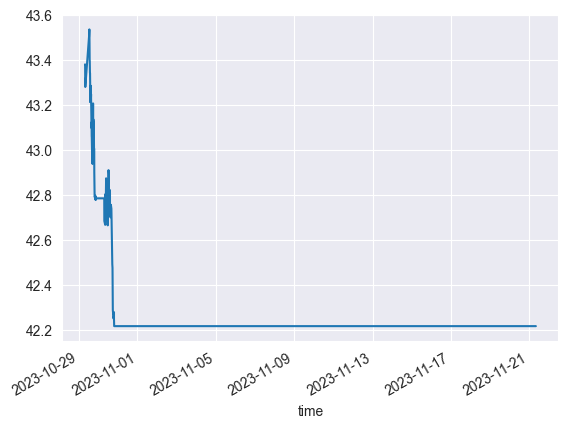

In [ ]:
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

plot_figsize=(10,5)
sns.set_style("darkgrid")



def get_balance(strategy: str):
    """ Read balance history from data"""
    
    data_dir=f"../data"
    env_dir="yandex-cloud"
    account_dir=f"{data_dir}/{env_dir}/{strategy}/account"
    print(f"Reading balance files from {account_dir}")
    #file_path = sorted([f for f in os.listdir(account_dir) if f.endswith(f"{symbol}_{name}.csv")])[-1]
    files = sorted([f for f in os.listdir(account_dir) if f.endswith(f".csv")])
    df = pd.concat([pd.read_csv(f"{account_dir}/{f}", parse_dates=True, index_col="time") for f in files]).sort_index()
    df["datetime"] = df.index
    return df

balance = get_balance(strategy)
balance["balance"].plot()
plt.show()
px.line(balance, "datetime", "balance", title=f"{strategy} balance USDT").update_traces(mode='lines+markers').show()


## Predicted and actual low/high

In [5]:
import os
import glob
import pandas as pd
from datetime import timedelta,date
import matplotlib.pyplot as plt
import plotly.express as px

def read_last(symbol: str, name: str, n=1000):
    xy_dir=f"{data_dir}/{strategy}/Xy"

    file_path = sorted([f for f in os.listdir(xy_dir) if f.endswith(f"{symbol}_{name}.csv")])[-1]
    file_path = f"{xy_dir}/{file_path}"
    print(f"Read from {file_path}")
    return pd.read_csv(file_path, parse_dates=True).tail(n)


def read_last_xy(data_dir):
    """ Read days from start to end from local predictions history"""
    
    #data=read_last(symbol, "data", n)
    X=read_last(symbol, "x")
    y=read_last(symbol, "y").set_index('close_time')
    data=pd.merge(X,y, left_index=True, right_index=True) 
    #y=pd.concat([data,y])
    return data,X,y


# Read candles for last 3 days
print(symbol)
data,x,y = read_last_xy(data_dir)
y.tail()


BTC-USDT
Read from ../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-21_BTC-USDT_x.csv
Read from ../data/yandex-cloud/LongCandleDenseStrategy/Xy/2023-11-21_BTC-USDT_y.csv


,signal_pred,signal_actual
close_time,,
2023-11-21 17:23:15.798,0,0
2023-11-21 17:23:47.874,0,0
2023-11-21 17:24:21.228,0,0
2023-11-21 17:24:53.279,0,0
2023-11-21 17:25:26.293,0,0


In [7]:

#actual_signal_counts = y['signal_actual'].diff().to_numpy().nonzero().value_counts()
actual_signal_counts = y['signal_actual'].diff().value_counts()


#actual_signal_counts = actual_signal_counts[actual_signal_counts['signal_actual']!=0]
pred_signal_counts = y['signal_pred'].diff().value_counts()
print(actual_signal_counts)


signal_actual
 0.0    959
 1.0     19
-1.0     19
 2.0      1
-2.0      1
Name: count, dtype: int64


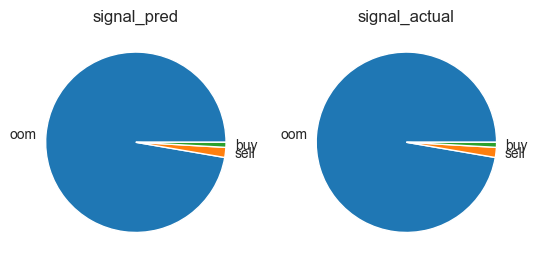

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

def plot_value_counts(ax, df, col):
    vc = df[col].value_counts()
    label_map={0:'oom', 1:'buy', -1: 'sell'}
    labels = [ label_map[signal] for signal in vc.index.tolist()]
    ax.pie(y['signal_pred'].value_counts(), labels = labels)
    ax.set_title(col)

plot_value_counts(ax1, y, 'signal_pred')
plot_value_counts(ax2, y, 'signal_actual')

plt.show()

#y['signal_pred'].value_counts().plot(kind='pie', title='predicted', labels=['a','b','c'], axis=ax1)
#y['signal_pred'].value_counts().plot(kind='pie', title='predicted', labels=['a','b','c'])

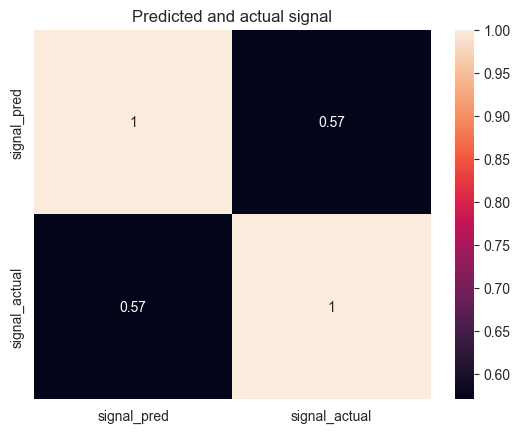

In [9]:
import seaborn as sns

sns.heatmap(y.corr(), annot=True)
plt.title('Predicted and actual signal')
plt.show()

<AxesSubplot:>

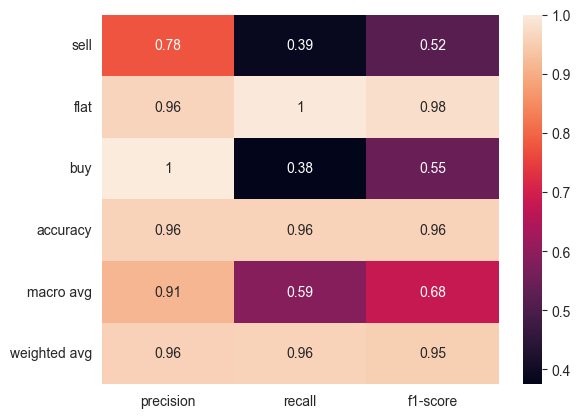

In [10]:
from sklearn.metrics import classification_report

clf_report = classification_report(y['signal_actual'],
                                   y['signal_pred'],
                                   #labels=['sell', 'flat', 'buy'],
                                   target_names=['sell', 'flat', 'buy'],
                                   output_dict=True)
#print(clf_report)
#sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
#sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T[::-1], annot=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

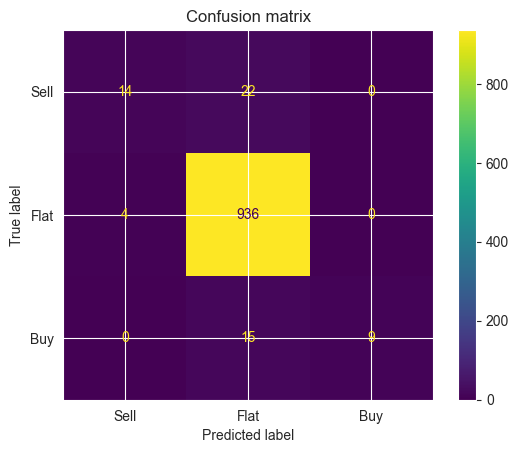

[[ 14  22   0]
 [  4 936   0]
 [  0  15   9]]


In [11]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y['signal_actual'], y['signal_pred'])

metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Sell', 'Flat', 'Buy']).plot()
plt.title('Confusion matrix')
plt.show()
print(confusion_matrix)

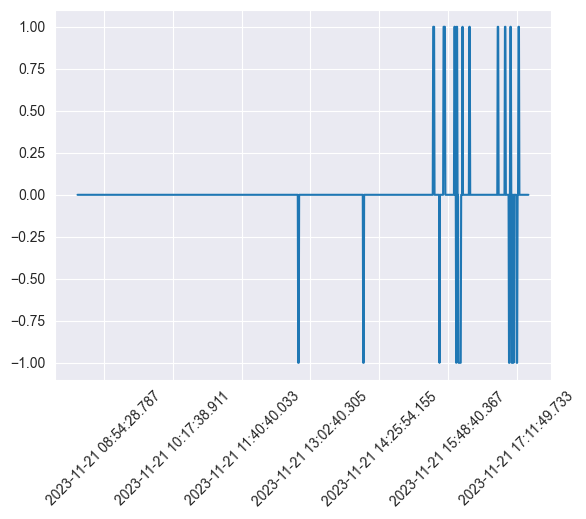

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(y.index, y['signal_pred']-y['signal_actual'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=45)

#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#plt.gca().xaxis.set_major_formatter(ConsizeDateFormatter())
plt.show()

In [13]:
import plotly.express as px
px.bar(x=y.index, 
    y=y['signal_pred']-y['signal_actual'], 
    title='Predicted and actual signal difference. diff = predicted - actual',
    labels = {'x': 'time', 'y':'predicted - actual'}
      ).show()